In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import plotly as pt
import plotly.express as px
import plotly.graph_objects as go
#%matplotlib.inline #used in background process
#import
#import

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/covid analysis/covid_19_clean_complete.csv',parse_dates=['Date'])


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
df.rename(columns={"Date":"date",'Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long','Confirmed':'confirmed','Deaths':'deaths',
                   'Recovered':'recovered'},inplace=True)
df.head(1)

,state,country,lat,long,date,confirmed,deaths,recovered
0,NaN,Thailand,15.0,101.0,2020-01-22,2.0,0.0,0.0


In [ ]:
df['active']=df['confirmed']-df['deaths']-df['recovered']
df.head(2)
df

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0,0.0


In [ ]:
top=df[df['date']==df['date'].max()]
df['date'].max()

Timestamp('2020-03-23 00:00:00')

In [ ]:
world=top.groupby('country')['confirmed','active' ,'deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [ ]:
figure=px.choropleth(world,locations='country', locationmode='country names',color='active',hover_name='country',range_color=[1,1000],
                     color_continuous_scale='blues',title='Countries with Active caes')
figure.show()

In [ ]:
totalcases=df.groupby('date')['date','confirmed'].sum().reset_index()
totalcases


,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


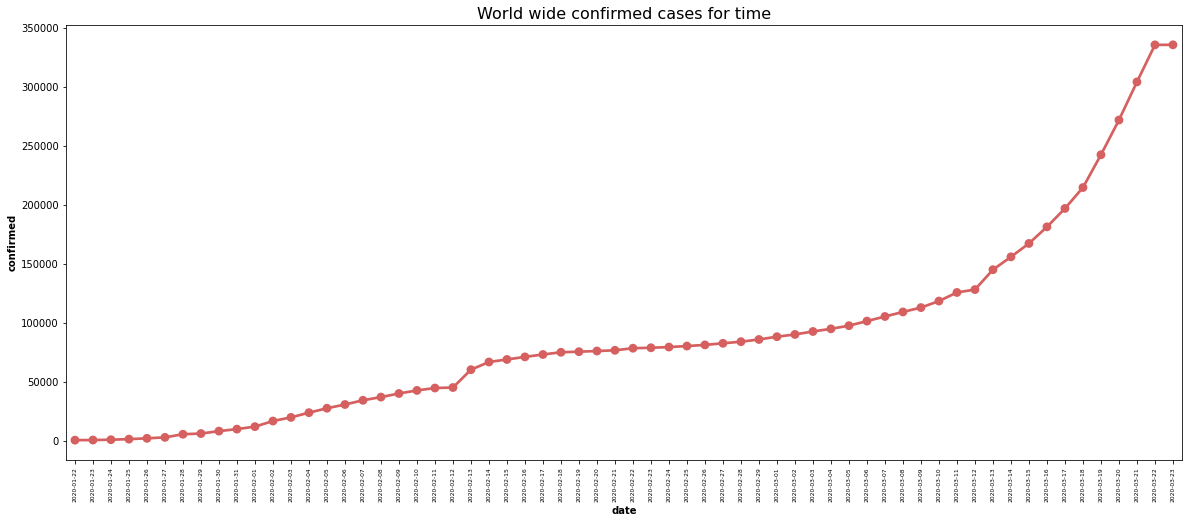

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=6)
plt.yticks(fontsize=10)
plt.xlabel('Dates',fontsize=10,fontweight='bold')
plt.ylabel('total cases',fontsize=10,fontweight='bold')
plt.title('World wide confirmed cases for time',fontsize=16)
ax=sns.pointplot(x=totalcases.date.dt.date,y=totalcases.confirmed,color='r')

In [ ]:
totalcases.date.dt.day

0     22
1     23
2     24
3     25
4     26
      ..
57    19
58    20
59    21
60    22
61    23
Name: date, Length: 62, dtype: int64

In [ ]:
topactives=df.groupby('country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
print(topactives.head())

       country     active
0        China  1624545.0
1        Italy   407570.0
2        Spain   162715.0
3  South Korea   162275.0
4      Germany   158657.0


In [ ]:

topactives.dtypes


country     object
active     float64
dtype: object

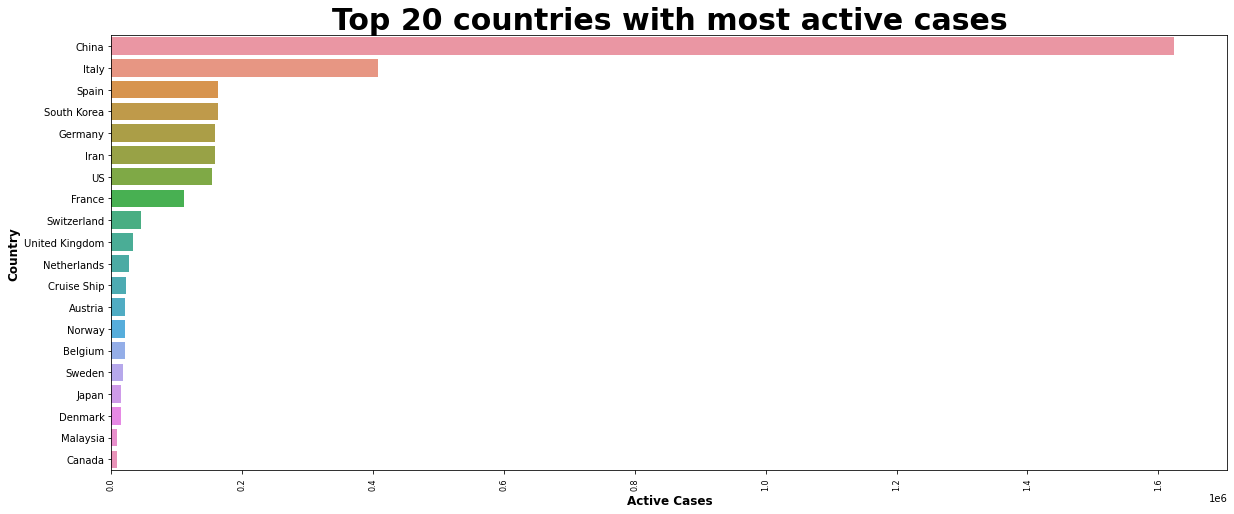

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('Active',fontsize=12,fontweight='bold')
plt.ylabel('Country',fontsize=12,fontweight='bold')

plt.title('Top 20 countries with most active cases',fontsize=30,fontweight='bold')
ax=sns.barplot(x=topactives.active,y=topactives.country)
ax.set(xlabel='Active Cases',ylabel='Country')
plt.show()

In [ ]:
df.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered', 'active'],
      dtype='object')

In [ ]:
df.shape

(19220, 9)

In [ ]:
df.describe()

,lat,long,confirmed,deaths,recovered,active
count,19220.000000,19220.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,25.088643,5.289362,287.734586,10.237994,103.066341,174.430251
std,23.448518,80.081866,3297.651489,155.703574,1795.041235,1916.181233
min,-41.454500,-157.498300,0.000000,0.000000,0.000000,-177.000000
25%,12.518600,-70.162700,0.000000,0.000000,0.000000,0.000000
50%,31.221000,9.775000,0.000000,0.000000,0.000000,0.000000
75%,42.165700,57.500000,8.000000,0.000000,0.000000,5.000000
max,72.000000,178.065000,67800.000000,5476.000000,59879.000000,50633.000000


In [ ]:
df.isnull().sum()

state        10788
country          0
lat              0
long             0
date             0
confirmed        1
deaths           1
recovered        1
active           1
dtype: int64

In [ ]:
df.dtypes

state                object
country              object
lat                 float64
long                float64
date         datetime64[ns]
confirmed           float64
deaths              float64
recovered           float64
active              float64
dtype: object

In [ ]:
df.head(20)

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0
5,British Columbia,Canada,49.2827,-123.1207,2020-01-22,0.0,0.0,0.0,0.0
6,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0.0,0.0,0.0,0.0
7,Victoria,Australia,-37.8136,144.9631,2020-01-22,0.0,0.0,0.0,0.0
8,Queensland,Australia,-28.0167,153.4000,2020-01-22,0.0,0.0,0.0,0.0
9,NaN,Cambodia,11.5500,104.9167,2020-01-22,0.0,0.0,0.0,0.0


In [ ]:
china=df[df.country=='China']
china

,state,country,lat,long,date,confirmed,deaths,recovered,active
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0,399.0
158,Guangdong,China,23.3417,113.4244,2020-01-22,26.0,0.0,0.0,26.0
159,Henan,China,33.8820,113.6140,2020-01-22,5.0,0.0,0.0,5.0
160,Zhejiang,China,29.1832,120.0934,2020-01-22,10.0,0.0,0.0,10.0
161,Hunan,China,27.6104,111.7088,2020-01-22,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
19098,Inner Mongolia,China,44.0935,113.9448,2020-03-23,75.0,1.0,74.0,0.0
19099,Ningxia,China,37.2692,106.1655,2020-03-23,75.0,0.0,75.0,0.0
19103,Qinghai,China,35.7452,95.9956,2020-03-23,18.0,0.0,18.0,0.0
19104,Macau,China,22.1667,113.5500,2020-03-23,24.0,0.0,10.0,14.0


In [ ]:
china=china.groupby('date')['confirmed','deaths','recovered','active'].sum().reset_index()
china

,date,confirmed,deaths,recovered,active
0,2020-01-22,548.0,17.0,28.0,503.0
1,2020-01-23,643.0,18.0,30.0,595.0
2,2020-01-24,920.0,26.0,36.0,858.0
3,2020-01-25,1406.0,42.0,39.0,1325.0
4,2020-01-26,2075.0,56.0,49.0,1970.0
...,...,...,...,...,...
57,2020-03-19,81156.0,3249.0,70535.0,7372.0
58,2020-03-20,81250.0,3253.0,71266.0,6731.0
59,2020-03-21,81305.0,3259.0,71857.0,6189.0
60,2020-03-22,81397.0,3265.0,72362.0,5770.0


In [ ]:
india=df[df.country=='India']
india

,state,country,lat,long,date,confirmed,deaths,recovered,active
15,NaN,India,21.0,78.0,2020-01-22,0.0,0.0,0.0,0.0
325,NaN,India,21.0,78.0,2020-01-23,0.0,0.0,0.0,0.0
635,NaN,India,21.0,78.0,2020-01-24,0.0,0.0,0.0,0.0
945,NaN,India,21.0,78.0,2020-01-25,0.0,0.0,0.0,0.0
1255,NaN,India,21.0,78.0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
17685,NaN,India,21.0,78.0,2020-03-19,194.0,4.0,15.0,175.0
17995,NaN,India,21.0,78.0,2020-03-20,244.0,5.0,20.0,219.0
18305,NaN,India,21.0,78.0,2020-03-21,330.0,4.0,23.0,303.0
18615,NaN,India,21.0,78.0,2020-03-22,396.0,7.0,27.0,362.0


In [ ]:
india=india.groupby('date')['confirmed','deaths','recovered','active'].sum().reset_index()
india

,date,confirmed,deaths,recovered,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0,175.0
58,2020-03-20,244.0,5.0,20.0,219.0
59,2020-03-21,330.0,4.0,23.0,303.0
60,2020-03-22,396.0,7.0,27.0,362.0


In [ ]:
india=india.iloc[7:].reset_index().drop("index",axis=1)
india.head()

,date,confirmed,deaths,recovered,active
0,2020-01-29,0.0,0.0,0.0,0.0
1,2020-01-30,1.0,0.0,0.0,1.0
2,2020-01-31,1.0,0.0,0.0,1.0
3,2020-02-01,1.0,0.0,0.0,1.0
4,2020-02-02,2.0,0.0,0.0,2.0


In [ ]:
italy=df[df.country=='Italy']
italy

,state,country,lat,long,date,confirmed,deaths,recovered,active
16,NaN,Italy,43.0,12.0,2020-01-22,0.0,0.0,0.0,0.0
326,NaN,Italy,43.0,12.0,2020-01-23,0.0,0.0,0.0,0.0
636,NaN,Italy,43.0,12.0,2020-01-24,0.0,0.0,0.0,0.0
946,NaN,Italy,43.0,12.0,2020-01-25,0.0,0.0,0.0,0.0
1256,NaN,Italy,43.0,12.0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
17686,NaN,Italy,43.0,12.0,2020-03-19,41035.0,3405.0,4440.0,33190.0
17996,NaN,Italy,43.0,12.0,2020-03-20,47021.0,4032.0,4440.0,38549.0
18306,NaN,Italy,43.0,12.0,2020-03-21,53578.0,4825.0,6072.0,42681.0
18616,NaN,Italy,43.0,12.0,2020-03-22,59138.0,5476.0,7024.0,46638.0


In [ ]:
italy=italy.groupby('date')['confirmed','deaths','recovered','active'].sum().reset_index()
italy.head()

,date,confirmed,deaths,recovered,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0


In [ ]:
italy=italy.iloc[9:].reset_index().drop("index",axis=1)
italy

,date,confirmed,deaths,recovered,active
0,2020-01-31,2.0,0.0,0.0,2.0
1,2020-02-01,2.0,0.0,0.0,2.0
2,2020-02-02,2.0,0.0,0.0,2.0
3,2020-02-03,2.0,0.0,0.0,2.0
4,2020-02-04,2.0,0.0,0.0,2.0
5,2020-02-05,2.0,0.0,0.0,2.0
6,2020-02-06,2.0,0.0,0.0,2.0
7,2020-02-07,3.0,0.0,0.0,3.0
8,2020-02-08,3.0,0.0,0.0,3.0
9,2020-02-09,3.0,0.0,0.0,3.0


In [ ]:
us=df[df.country=='US']
us

,state,country,lat,long,date,confirmed,deaths,recovered,active
98,Washington,US,47.4009,-121.4905,2020-01-22,0.0,0.0,0.0,0.0
99,New York,US,42.1657,-74.9481,2020-01-22,0.0,0.0,0.0,0.0
100,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,0.0,0.0
101,Massachusetts,US,42.2302,-71.5301,2020-01-22,0.0,0.0,0.0,0.0
102,Diamond Princess,US,35.4437,139.6380,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19136,Puerto Rico,US,18.2208,-66.5901,2020-03-23,23.0,1.0,0.0,22.0
19150,Guam,US,13.4443,144.7937,2020-03-23,27.0,1.0,0.0,26.0
19167,Virgin Islands,US,18.3358,-64.8963,2020-03-23,NaN,NaN,NaN,NaN
19210,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,0.0,0.0,6.0


In [ ]:
us=us.groupby('date')['confirmed','deaths','recovered','active'].sum().reset_index()
us.head()


,date,confirmed,deaths,recovered,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0


In [ ]:
us=us.iloc[33:].reset_index().drop("index",axis=1)
us.head()

,date,confirmed,deaths,recovered,active
0,2020-02-24,36.0,0.0,0.0,36.0
1,2020-02-25,36.0,0.0,0.0,36.0
2,2020-02-26,42.0,0.0,0.0,42.0
3,2020-02-27,42.0,0.0,0.0,42.0
4,2020-02-28,44.0,0.0,0.0,44.0


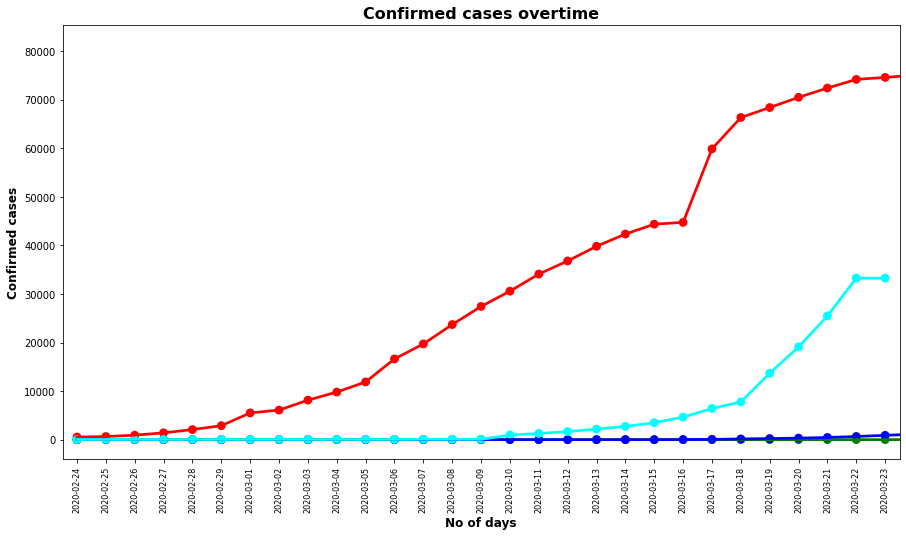

In [ ]:
#pointplot for confirmed cases of each country
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.confirmed,color='red')
sns.pointplot(india.date.dt.date,india.confirmed,color='green')
sns.pointplot(italy.date.dt.date,italy.confirmed,color='blue')
sns.pointplot(us.date.dt.date,us.confirmed,color='cyan')
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('No of days',fontsize=12,fontweight='bold')
plt.ylabel('Confirmed cases',fontsize=12,fontweight='bold')
plt.title('Confirmed cases overtime',fontsize=16,fontweight='bold')
plt.show()

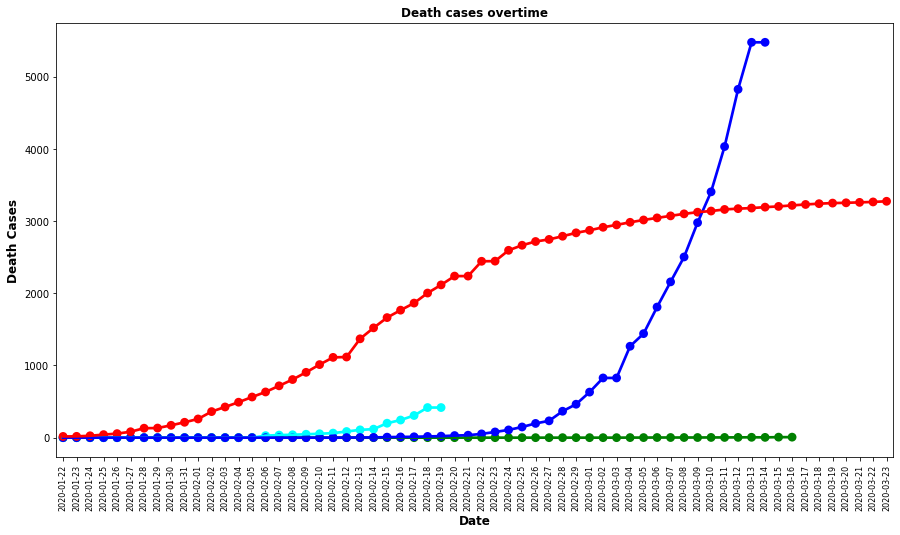

In [ ]:
#pointplot for death cases
plt.figure(figsize=(15,8))
sns.pointplot(india.date.dt.date,india.deaths,color='green')
sns.pointplot(us.date.dt.date,us.deaths,color='cyan')
sns.pointplot(italy.date.dt.date,italy.deaths,color='blue')
sns.pointplot(china.date.dt.date,china.deaths,color='red')
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('Date',fontsize=12,fontweight='bold')
plt.ylabel('Death Cases',fontsize=12,fontweight='bold')
plt.title('Death cases overtime',fontsize=12,fontweight='bold')
plt.show()



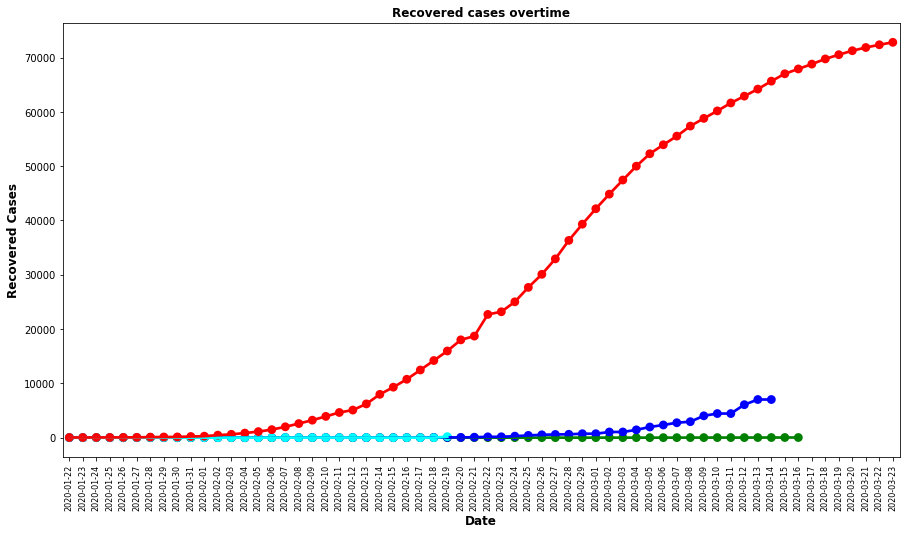

In [ ]:
#pointplot for recovered  
plt.figure(figsize=(15,8))
sns.pointplot(india.date.dt.date,india.recovered,color='green')
sns.pointplot(italy.date.dt.date,italy.recovered,color='blue')
sns.pointplot(us.date.dt.date,us.recovered,color='cyan')
sns.pointplot(china.date.dt.date,china.recovered,color='red')
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('Date',fontsize=12,fontweight='bold')
plt.ylabel('Recovered Cases',fontsize=12,fontweight='bold')
plt.title('Recovered cases overtime',fontsize=12,fontweight='bold')
plt.show()


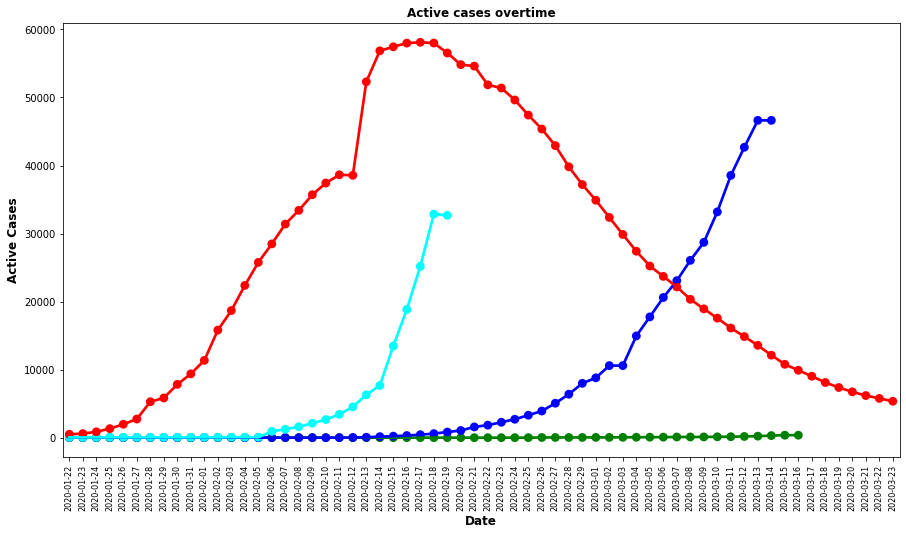

In [ ]:
#Pointplot for Active Cases of italy

plt.figure(figsize=(15,8))
sns.pointplot(india.date.dt.date,india.active,color='green')
sns.pointplot(italy.date.dt.date,italy.active,color='blue')
sns.pointplot(us.date.dt.date,us.active,color='cyan')
sns.pointplot(china.date.dt.date,china.active,color='red')
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('Date',fontsize=12,fontweight='bold')
plt.ylabel('Active Cases',fontsize=12,fontweight='bold')
plt.title('Active cases overtime',fontsize=12,fontweight='bold')
plt.show()

In [ ]:
#Detailed Analysis of covid cases in India

df_india=pd.read_excel('/content/drive/MyDrive/covid analysis/covid_19_india.xlsx')
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [ ]:
df_india['Total_cases']=df_india['Total Confirmed cases (Indian National)']	+ df_india['Total Confirmed cases ( Foreign National )']
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33
5,6,Haryana,14,14,11,0,28
6,7,Himachal Pradesh,3,0,0,1,3
7,8,Karnataka,41,0,3,1,41
8,9,Kerala,101,8,4,0,109
9,10,Madhya Pradesh,9,0,0,0,9


In [ ]:
df_india['total_active']=df_india['Total_cases']-df_india['Cured']-df_india['Death']
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,total_active
0,1,Andhra Pradesh,9,0,0,0,9,9
1,2,Bihar,3,0,0,1,3,2
2,3,Chhattisgarh,1,0,0,0,1,1
3,4,Delhi,30,1,6,1,31,24
4,5,Gujarat,32,1,0,1,33,32
5,6,Haryana,14,14,11,0,28,17
6,7,Himachal Pradesh,3,0,0,1,3,2
7,8,Karnataka,41,0,3,1,41,37
8,9,Kerala,101,8,4,0,109,105
9,10,Madhya Pradesh,9,0,0,0,9,9


In [ ]:
tot_cases=df_india.groupby('Name of State / UT')['total_active'].sum().sort_values(ascending=False).to_frame()
tot_cases

,total_active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
tot_cases.style.background_gradient(cmap='Greens') #pandas style function

,total_active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
df_india.head(1)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,total_active
0,1,Andhra Pradesh,9,0,0,0,9,9


In [ ]:
# Legend not working in below code

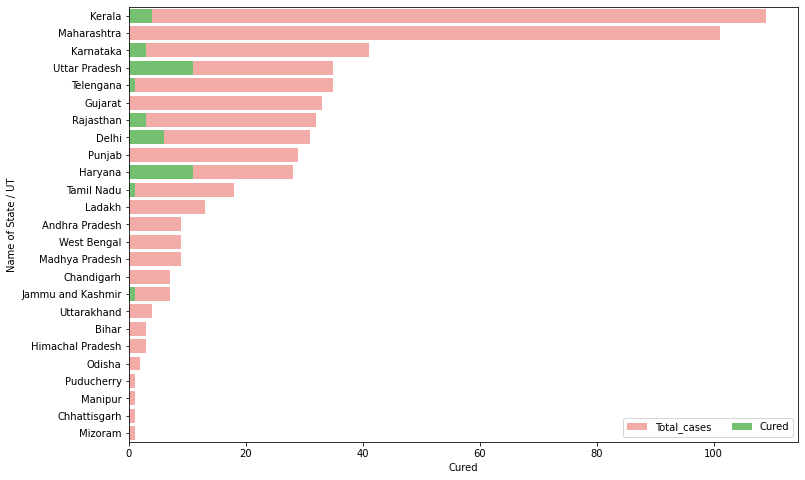

In [ ]:
f,ax=plt.subplots(figsize=(12,8))
data=df_india[['Name of State / UT','Total_cases','Cured','Death']]
data.sort_values('Total_cases',ascending=False,inplace=True)
sns.set_color_codes('pastel')
sns.barplot(x='Total_cases',y='Name of State / UT',data=data,label='Total_cases',color='r')
sns.set_color_codes('muted')
sns.barplot(x='Cured',y='Name of State / UT',data=data,label='Cured',color='g')
ax.legend(ncol=2,loc='lower right',frameon=True)


In [ ]:
#perday analysis
db_pdindia=pd.read_excel('/content/drive/MyDrive/covid analysis/per_day_cases.xlsx')
db_pdindia

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


In [ ]:
db_pdindia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             56 non-null     datetime64[ns]
 1   Total Cases                      56 non-null     int64         
 2   New Cases                        56 non-null     int64         
 3   Days after surpassing 100 cases  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


In [ ]:
#trend of covid cases in india
fig=go.Figure()
fig.add_trace(go.Scatter(x=db_pdindia['Date'],y=db_pdindia['Total Cases'],mode='lines+markers',name='Total_cases'))
fig.update_layout(title_text='Trend of Corona Virus case in India',plot_bgcolor='rgb(230,230,230)')
fig.show()

In [ ]:
fig=px.bar(db_pdindia,x='Date',y='New Cases',barmode='group',height=400)
fig.update_layout(title_text='Daily Corona Cases in India',plot_bgcolor='rgb(210,210,210)')

# Insights into covid cases globally below code

In [ ]:
df_confirmed=pd.read_csv('/content/drive/MyDrive/covid analysis/time_series_covid19_confirmed_global.csv')
df_deaths=pd.read_csv('/content/drive/MyDrive/covid analysis/time_series_covid19_deaths_global.csv')
df_recovered=pd.read_csv('/content/drive/MyDrive/covid analysis/time_series_covid19_recovered_global.csv')

In [ ]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,12,12,12,14,15,15,15,15,17,17,21,21,22,22,22,28,28,28,31,31,31,31,31,31,31,31,33,34,34,35,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,9,9,9,9,12,12,12,13,18,18,22,22,22,22,22,22,22,22,32,32,32,43,43,43,46,76,76,76,101,118,118,118,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,72,78,78,78,78,78,78,78,78,78,96,96,97,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,18,18,22,22,22,22,23,24,24,24,26,26,26,35,42,42,49,60,75,87,114,139,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_confirmed.rename({'Country/Region':'country'},inplace=True)
df_deaths.rename({'Country/Region':'country'},inplace=True)
df_recovered.rename({'Country/Region':'country'},inplace=True)

In [ ]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0,0.0


In [ ]:
df_india_cases=df.query('country=="India"').groupby('date')['confirmed','deaths','recovered'].sum().reset_index()
india_confirmed,india_recovered,india_deaths=df_india_cases[['date','confirmed']],df_india_cases[['date','recovered']],df_india_cases[['date','deaths']]

In [ ]:
df_india_cases.head()

,date,confirmed,deaths,recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0


In [ ]:
df.groupby('date').sum().head(10)

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0,509.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0,604.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0,877.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0,1351.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0,2005.0
2020-01-27,7777.4793,1639.7021,2922.0,82.0,61.0,2779.0
2020-01-28,7777.4793,1639.7021,5573.0,131.0,107.0,5335.0
2020-01-29,7777.4793,1639.7021,6161.0,133.0,126.0,5902.0
2020-01-30,7777.4793,1639.7021,8229.0,171.0,143.0,7915.0


In [ ]:
confirmed_cases=df.groupby('date').sum()['confirmed'].reset_index() #same as confirmed_cases=df.groupby('date')['confirmed'].sum().reset_index()
recovered_cases=df.groupby('date').sum()['recovered'].reset_index()
deaths_cases=df.groupby('date').sum()['deaths'].reset_index()
confirmed_cases

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


In [ ]:
fig.add_trace(go.Scatter(x=confirmed_cases['date'],y=confirmed_cases['confirmed'],name='confirmed',mode='lines+markers',line=dict(color='green')))
fig.add_trace(go.Scatter(x=recovered_cases['date'],y=recovered_cases['recovered'],name='recovered',mode='lines+markers',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=deaths_cases['date'],y=deaths_cases['deaths'],name='death',mode='lines+markers',line=dict(color='red')))
fig.update_layout(title_text='World Wide Covid-19 Cases',xaxis_tickfont_size=12,xaxis=dict(title='Date'),yaxis=dict(title='Number of cases'),plot_bgcolor='rgb(230,230,230)')
fig.show()
